# Structure Around One Atom

- Plots the density at each distance from the atom
- Shows the volume around one atom
- Atoms distance from the central atom 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate as interp
from scipy import integrate

import ase
from ase.calculators import lj
from ase import build

from ase.md.verlet import VelocityVerlet
from ase.md.nvtberendsen import NVTBerendsen
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase import units
from ase.io.trajectory import Trajectory

import atombond



In [2]:
import importlib
importlib.reload(atombond)

<module 'atombond' from 'C:\\Users\\AJoiner\\Documents\\Atomic-Bonding\\atombond.py'>

In [3]:
%matplotlib inline

In [5]:
traj_filenm = 'lj_rho0.82_T600_N500.traj'
traj = Trajectory(traj_filenm)

In [6]:
atoms=traj[-1]
Vtot = atoms.get_volume()
print(Vtot)
dist_a=atoms.get_all_distances(mic=True)
dists_a = np.sort(dist_a)

610.940258945


(498,)


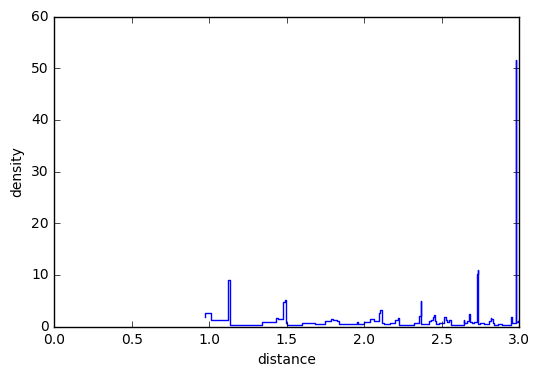

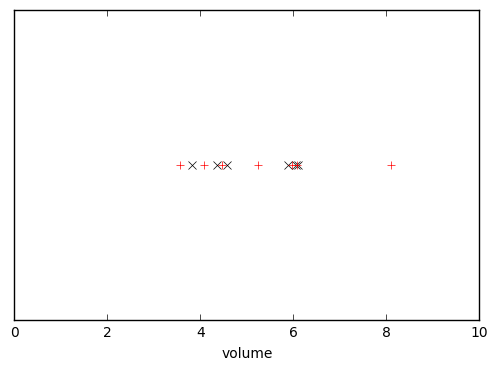

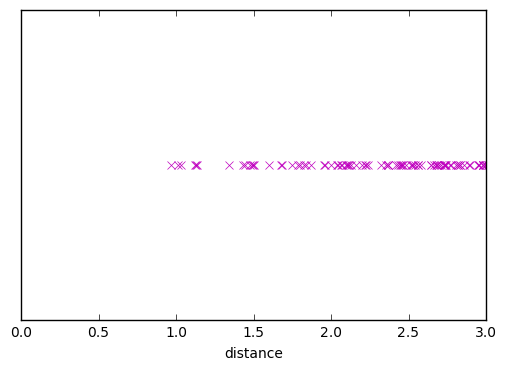

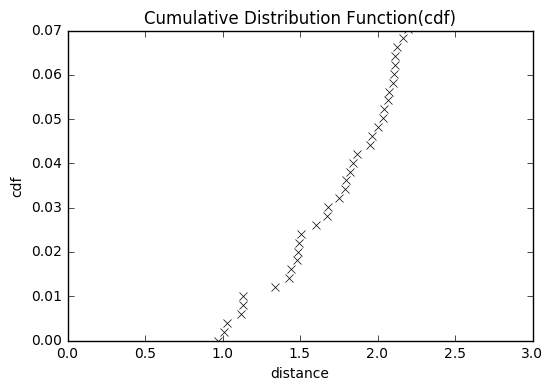

In [7]:
idist_a = dist_a[30]
idist_a.shape
idists_a= np.sort(idist_a)[1:]
frac_a = np.linspace(0,1,idists_a.size)
#print(idists_a)
iVol_a = 4/3*np.pi*idists_a**3

# calculates midpoint for volume
iVolmid_a=0.5*np.diff(iVol_a)+iVol_a[:-1]
iVolbound0 = iVol_a[0] - 0.5*(iVol_a[1]-iVol_a[0])
# iVolbound0 = iVol_a[0] - (iVolmid_a[0]-iVol_a[0])
iVolbound_a = np.hstack((iVolbound0,iVolmid_a))

idVol_a = np.diff(iVolbound_a)
print(idVol_a.shape)
# print(iVolbound_a)
rho_a = 1/idVol_a

plt.step(idists_a[0:99], rho_a[0:99], where='pre')
plt.xlim(0,3)
plt.xlabel('distance')
plt.ylabel('density')

plt.figure()
plt.plot(iVol_a, 0*iVol_a, 'kx')
plt.plot(iVolbound_a,0*iVolbound_a, 'r+')
ax = plt.gca()
ax.set_yticklabels([],visible=False)
ax.set_yticks([])
plt.xlim(0, 10)
plt.xlabel('volume')

plt.figure()
plt.plot(idists_a, 0*idists_a, 'mx')
plt.gca().set_yticklabels([], visible=False)
plt.gca().set_yticks([])
plt.xlabel('distance')
plt.xlim(0,3)

plt.figure()

plt.title('Cumulative Distribution Function(cdf)')
plt.plot(idists_a,frac_a,'kx')
plt.xlim(0,3)
plt.ylim(0,0.07)
plt.xlabel('distance')
plt.ylabel('cdf')
